In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Wczytywanie i łączenie danych z klasyfikacji
df1 = pd.read_csv("food_dataset_train.csv")
df2 = pd.read_csv("food_test_predictions.csv")

data = pd.concat([df1, df2], ignore_index=True)

# Dla pojedynczych plików:
#file_path = "sciezka_pliku.csv"
#data = pd.read_csv(file_path)

selected_features = [col for col in data.columns if col != "Name"]

data_encoded = data.copy()
for col in selected_features:
    data_encoded[col] = data_encoded[col].astype("category").cat.codes

X = data_encoded[selected_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dodanie rekordu do DataFrame
# new_record_df = pd.DataFrame([new_record])
# data = pd.concat([data, new_record_df], ignore_index=True)

# Zapis zaktualizowanego DataFrame do pliku CSV
# data.to_csv("food_dataset.csv", index=False)

# print("Dodano nowy rekord:")
# print(new_record_df)

#DBSCAN

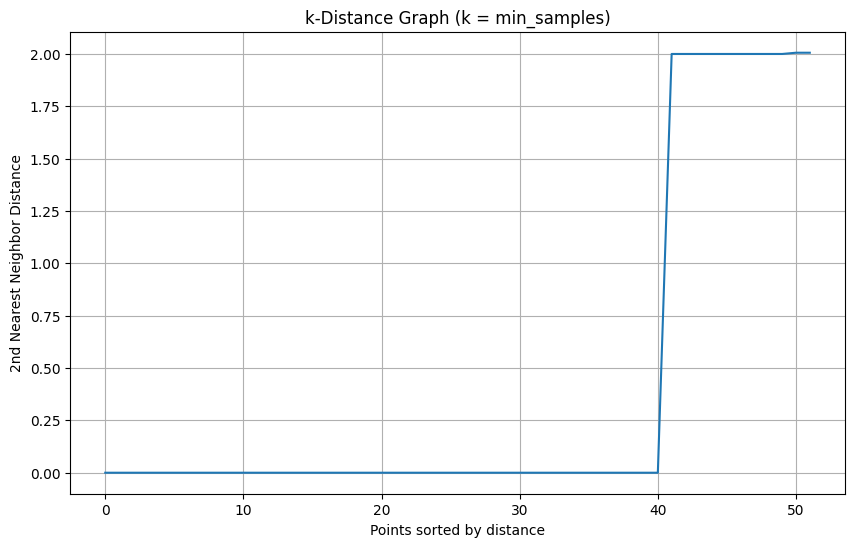

In [ ]:
# Odległość do 2. najbliższego sąsiada
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("k-Distance Graph (k = min_samples)")
plt.xlabel("Points sorted by distance")
plt.ylabel("2nd Nearest Neighbor Distance")
plt.grid()
plt.show()

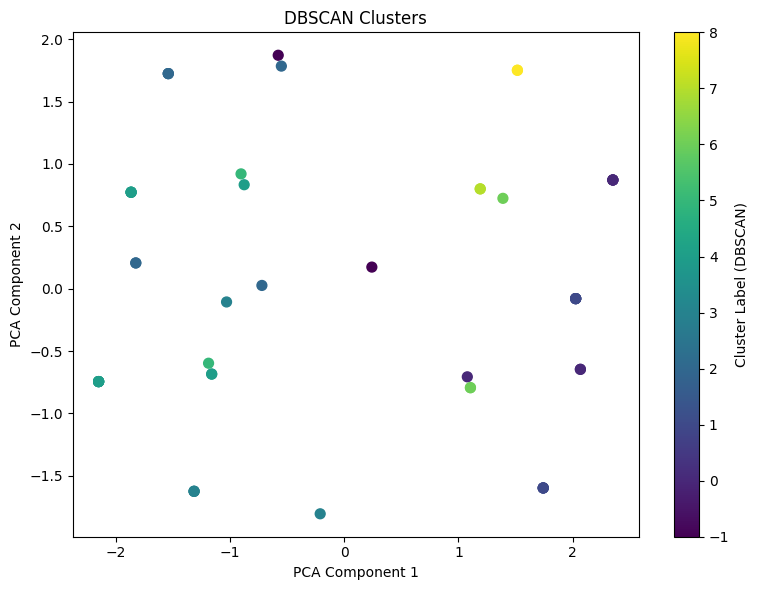

                            Name  Cluster_DBSCAN
0                    Tomato Soup               0
1                          Rosół               0
2                     Minestrone               1
3              French Onion Soup               1
4                 Grilled Cheese              -1
5                            BLT               2
6             Egg Salad Sandwich               3
7                          Szczi               1
8                         Panini               2
9                       Gazpacho               0
10                  Meatball Sub               4
11                         Ramen               1
12                         Gumbo              -1
13                        Bisque               3
14                 Avocado Toast               2
15                   Cheesesteak               4
16                     Wodzionka               1
17                      Consommé               0
18              Zupa Meksykańska               0
19         Peanut Bu

In [ ]:
# Kopia danych (oryginał nie będzie modyfikowany)
data_dbscan = data.copy()

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2) # Wybrane na podsawie powyższego wykresu
data_dbscan['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# PCA dla wizualizacji DBSCAN
pca_dbscan = PCA(n_components=2)
X_reduced_dbscan = pca_dbscan.fit_transform(X_scaled)

data_dbscan['PCA1_DBSCAN'] = X_reduced_dbscan[:, 0]
data_dbscan['PCA2_DBSCAN'] = X_reduced_dbscan[:, 1]

# Wizualizacja
plt.figure(figsize=(8, 6))
plt.scatter(
    data_dbscan['PCA1_DBSCAN'],
    data_dbscan['PCA2_DBSCAN'],
    c=data_dbscan['Cluster_DBSCAN'],
    cmap='viridis',
    s=50
)
plt.colorbar(label="Cluster Label (DBSCAN)")
plt.title("DBSCAN Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

# Wyniki
print(data_dbscan[['Name', 'Cluster_DBSCAN']])

In [ ]:
# Macierz korelacji - tylko do podglądu, nie wpływa na działanie PCA ani klasteryzacji
# plt.figure(figsize=(8, 8))
# sns.heatmap(pd.DataFrame(X_scaled, columns=selected_features).corr(), annot=True, cmap='coolwarm')
# plt.title("Macierz korelacji cech")
# plt.show()

In [ ]:
# Grupowanie danych według klastrów DBSCAN
clusters_dbscan = data_dbscan.groupby('Cluster_DBSCAN')

# Ustalenie szerokości kolumny na podstawie najdłuższej nazwy
col_width = data_dbscan['Name'].str.len().max() + 2

# Wyświetlanie zawartości każdego klastra
for cluster_label, cluster_data in clusters_dbscan:
    print(f"\n=== Cluster {cluster_label} ===")
    for name in cluster_data['Name']:
        print(f"{name:<{col_width}}")


=== Cluster -1 ===
Grilled Cheese                
Gumbo                         

=== Cluster 0 ===
Tomato Soup                   
Rosół                         
Gazpacho                      
Consommé                      
Zupa Meksykańska              
Siemieniotka                  
Żur w chlebie                 

=== Cluster 1 ===
Minestrone                    
French Onion Soup             
Szczi                         
Ramen                         
Wodzionka                     
Zupa gulaszowa                
Eintopf                       
Moczka                        
Koktajl owocowy               

=== Cluster 2 ===
BLT                           
Panini                        
Avocado Toast                 
Peanut Butter & Jelly         
Clam Chowder                  
Fondant czekoladowy           
Omlet                         

=== Cluster 3 ===
Egg Salad Sandwich            
Bisque                        
Banh Mi                       
Pimento Cheese Sandwich       
Beef 

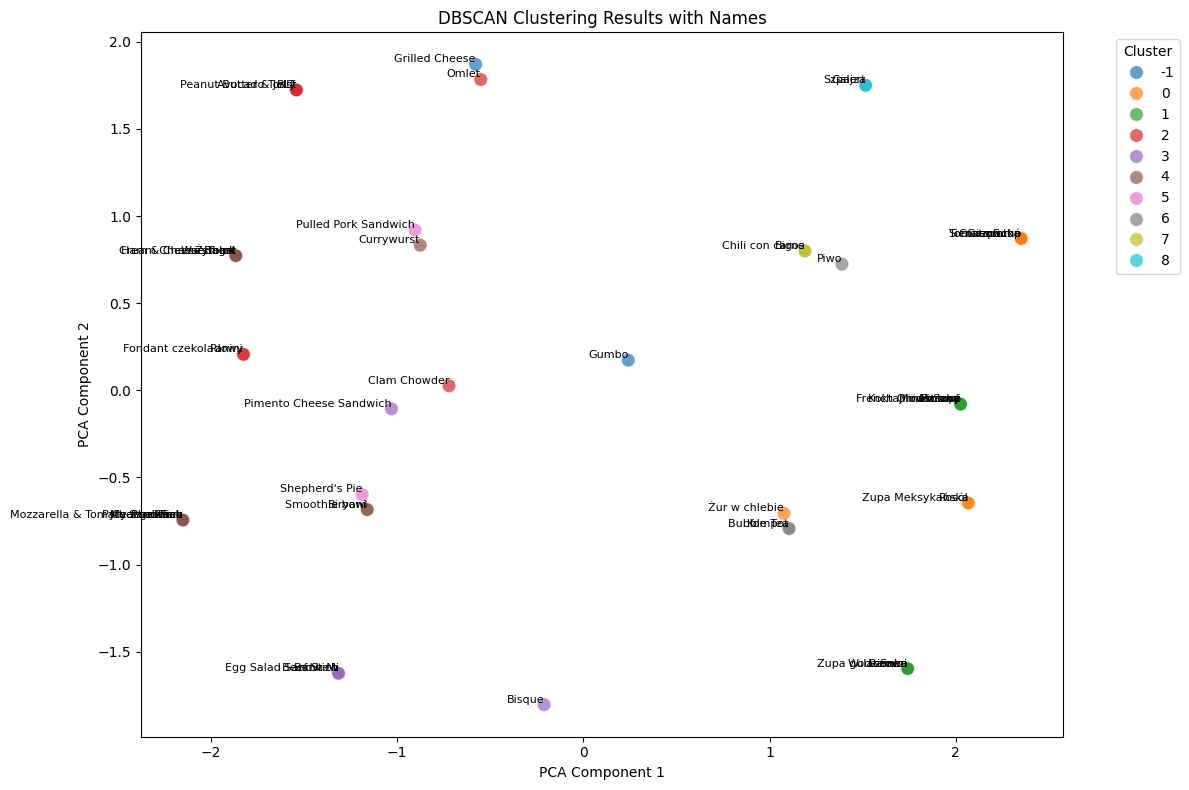

In [ ]:
# Redukcja wymiarowości za pomocą PCA (tylko do wizualizacji DBSCAN)
pca_dbscan = PCA(n_components=2)
X_reduced_dbscan = pca_dbscan.fit_transform(X_scaled)

# Dodanie współrzędnych PCA do danych
data_dbscan['PCA1_DBSCAN'] = X_reduced_dbscan[:, 0]
data_dbscan['PCA2_DBSCAN'] = X_reduced_dbscan[:, 1]

# Tworzenie wykresu punktowego z nazwami
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1_DBSCAN',
    y='PCA2_DBSCAN',
    hue='Cluster_DBSCAN',
    palette='tab10',
    data=data_dbscan,
    s=100,
    alpha=0.7
)

# Dodanie nazw jedzenia jako tekstu na wykresie
for i in range(len(data_dbscan)):
    plt.text(
        data_dbscan['PCA1_DBSCAN'][i],
        data_dbscan['PCA2_DBSCAN'][i],
        data_dbscan['Name'][i],
        fontsize=8,
        ha='right',
        va='bottom'
    )

# Dodanie etykiet
plt.title('DBSCAN Clustering Results with Names')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#K-Means

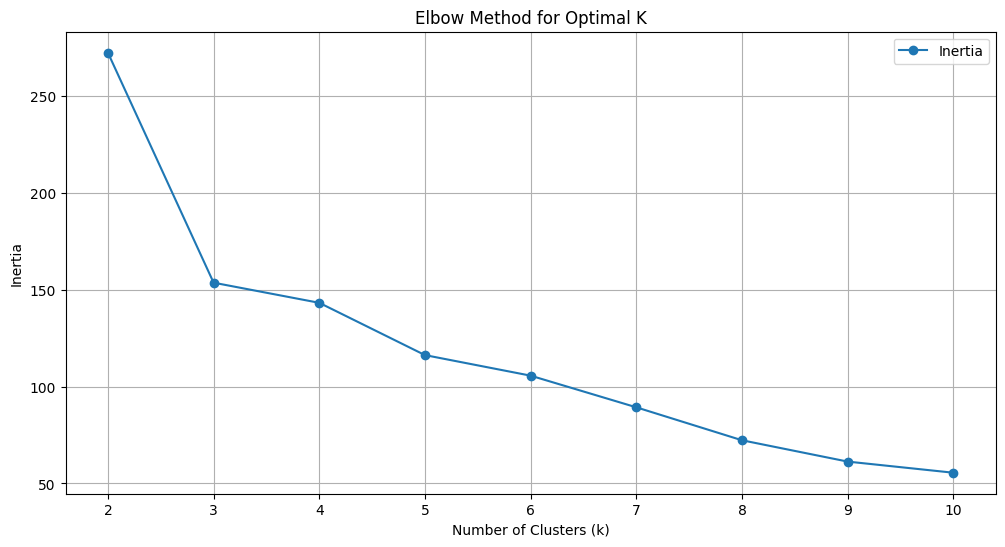

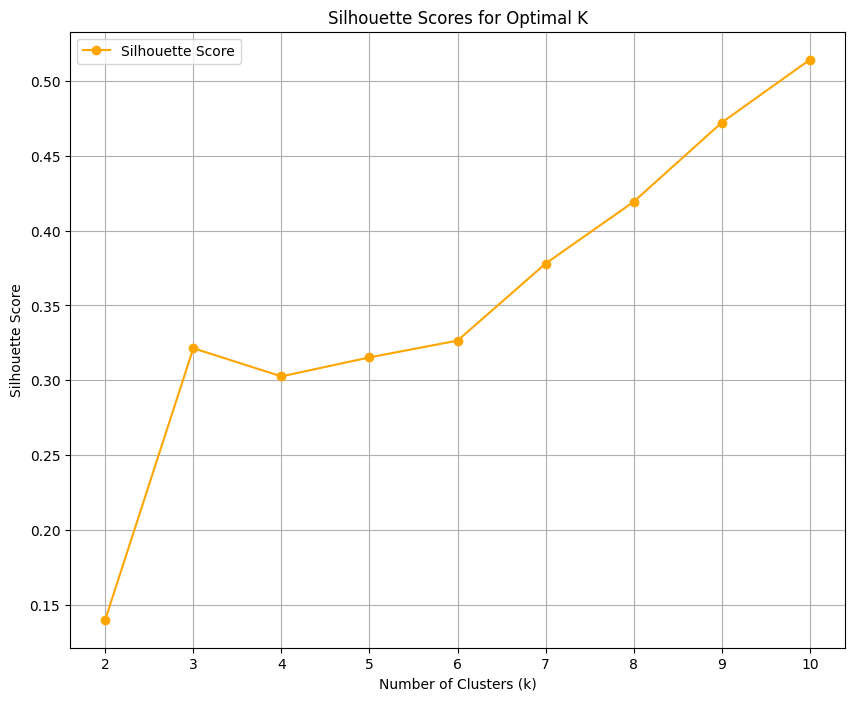

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Szukanie optymalnej liczby klastrów za pomocą metody łokcia
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Wykres metody łokcia
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, marker='o', label="Inertia")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.legend()
plt.show()

# Wykres metody silhouette
plt.figure(figsize=(10, 8))
plt.plot(k_values, silhouette_scores, marker='o', color='orange', label="Silhouette Score")
plt.title("Silhouette Scores for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.legend()
plt.show()

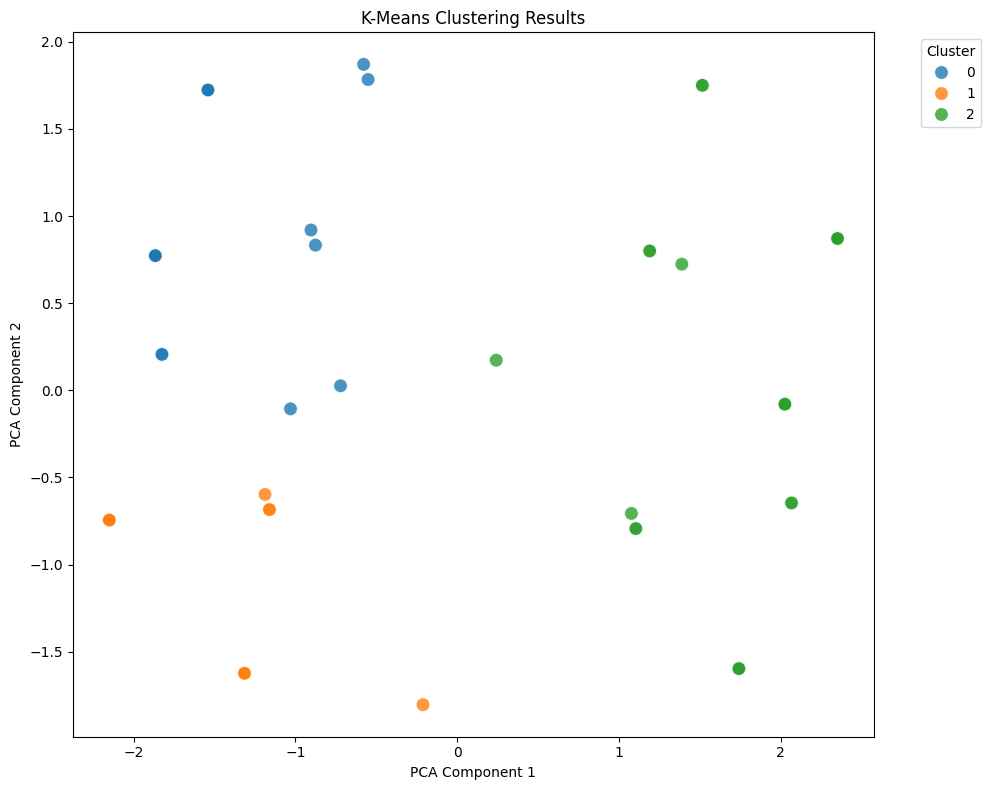


=== Cluster 0 ===
Grilled Cheese                
BLT                           
Panini                        
Avocado Toast                 
Peanut Butter & Jelly         
Clam Chowder                  
Pulled Pork Sandwich          
Wurstbrot                     
Pimento Cheese Sandwich       
Cream Cheese Bagel            
Ham & Cheese Toast            
Fondant czekoladowy           
Omlet                         
Żymlok                        
Currywurst                    

=== Cluster 1 ===
Egg Salad Sandwich            
Meatball Sub                  
Bisque                        
Cheesesteak                   
Banh Mi                       
Mozzarella & Tomato Sandwich  
Smoothie bowl                 
Pyry z gzikiem                
Biryani                       
Taco                          
Pancakes                      
Shepherd's Pie                
Beef Stew                     

=== Cluster 2 ===
Tomato Soup                   
Rosół                         
Minestrone   

In [ ]:
# Klasteryzacja z k=3
optimal_k = 3 # Opierając się na metodzie łokcia

# Klasteryzacja z optymalnym K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_kmeans = data.copy()
data_kmeans['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Wizualizacja klastrów
from sklearn.decomposition import PCA
pca_kmeans = PCA(n_components=2)
X_kmeans_reduced = pca_kmeans.fit_transform(X_scaled)

data_kmeans['PCA1'] = X_kmeans_reduced[:, 0]
data_kmeans['PCA2'] = X_kmeans_reduced[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_KMeans',
    palette='tab10',
    data=data_kmeans,
    s=100,
    alpha=0.8
)
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Grupowanie danych według klastrów
clusters_kmeans = data_kmeans.groupby('Cluster_KMeans')

# Ustalenie szerokości kolumny na podstawie najdłuższej nazwy
col_width = data['Name'].str.len().max() + 2

# Wyświetlanie zawartości każdego klastra z nazwami potraw
for cluster_label, cluster_data in clusters_kmeans:
    print(f"\n=== Cluster {cluster_label} ===")
    for name in cluster_data['Name']:
        print(f"{name:<{col_width}}")


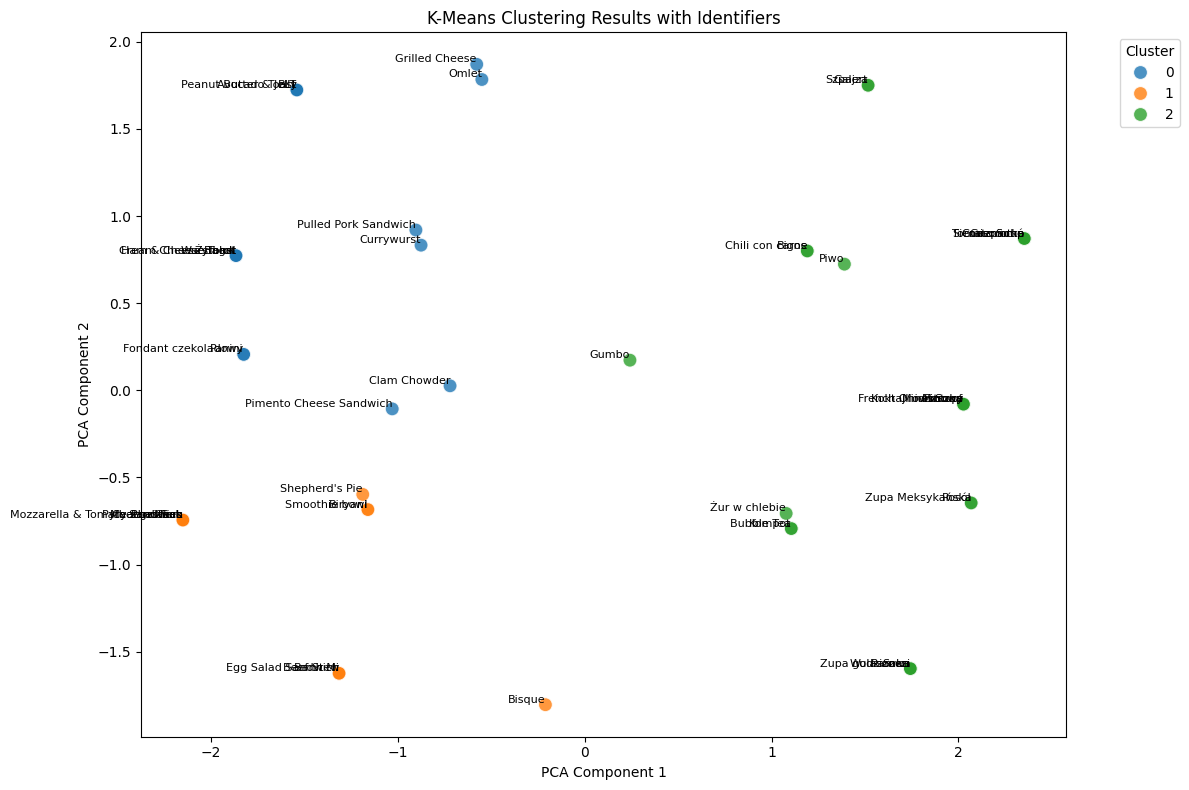

In [ ]:
# Wizualizacja klastrów KMeans (K=3) z nazwami potraw
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_KMeans',
    palette='tab10',
    data=data_kmeans,
    s=100,
    alpha=0.8
)

# Dodanie nazw potraw przy punktach
for i in range(len(data_kmeans)):
    plt.text(
        data_kmeans['PCA1'][i],
        data_kmeans['PCA2'][i],
        data_kmeans['Name'][i],
        fontsize=8,
        ha='right',
        va='bottom'
    )

# Ustawienia wykresu
plt.title('K-Means Clustering Results with Identifiers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


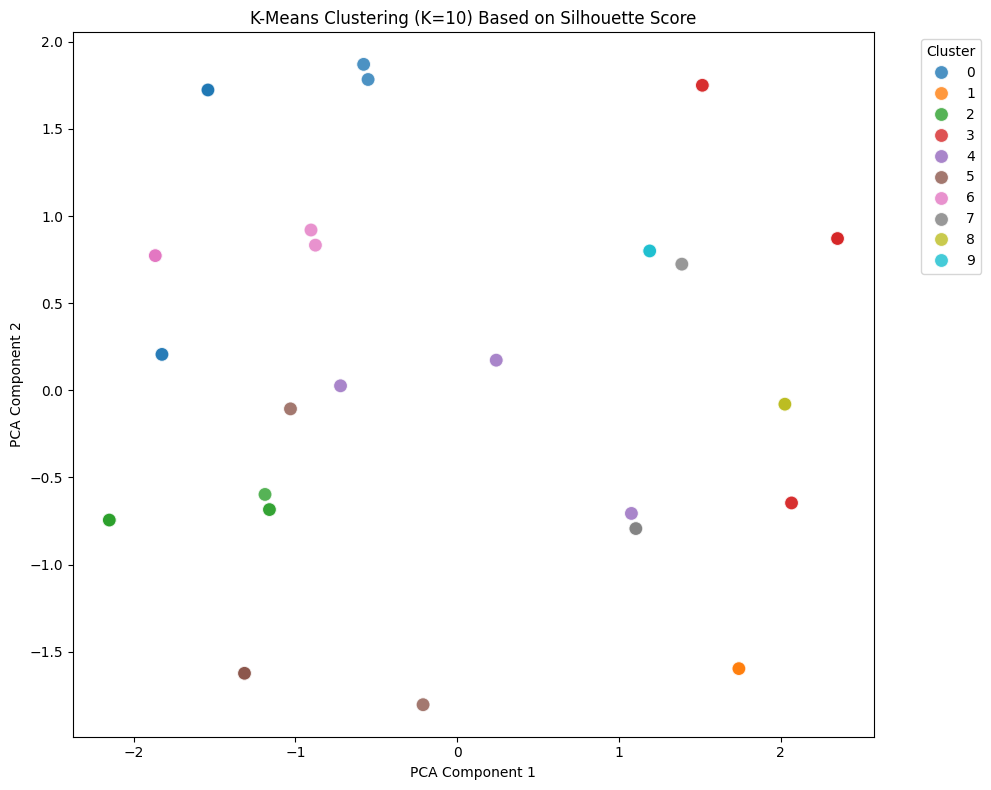


=== Cluster 0 ===
Grilled Cheese                
BLT                           
Panini                        
Avocado Toast                 
Peanut Butter & Jelly         
Fondant czekoladowy           
Omlet                         

=== Cluster 1 ===
Szczi                         
Ramen                         
Wodzionka                     
Zupa gulaszowa                

=== Cluster 2 ===
Meatball Sub                  
Cheesesteak                   
Mozzarella & Tomato Sandwich  
Smoothie bowl                 
Pyry z gzikiem                
Biryani                       
Taco                          
Pancakes                      
Shepherd's Pie                

=== Cluster 3 ===
Tomato Soup                   
Rosół                         
Gazpacho                      
Consommé                      
Zupa Meksykańska              
Siemieniotka                  
Galert                        
Szpajza                       

=== Cluster 4 ===
Gumbo                         
Clam C

In [ ]:
# Klasteryzacja z K=10 (optymalne silhouette score)
kmeans_10 = KMeans(n_clusters=10, random_state=42) # Opierając się na Silhouette Score
data_kmeans_10 = data.copy()
data_kmeans_10['Cluster_KMeans'] = kmeans_10.fit_predict(X_scaled)

# PCA do wizualizacji
pca_kmeans_10 = PCA(n_components=2)
X_kmeans_10_reduced = pca_kmeans_10.fit_transform(X_scaled)

data_kmeans_10['PCA1'] = X_kmeans_10_reduced[:, 0]
data_kmeans_10['PCA2'] = X_kmeans_10_reduced[:, 1]

# Wykres
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_KMeans',
    palette='tab10',
    data=data_kmeans_10,
    s=100,
    alpha=0.8
)
plt.title('K-Means Clustering (K=10) Based on Silhouette Score')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Grupowanie danych
clusters_kmeans_10 = data_kmeans_10.groupby('Cluster_KMeans')

# Szerokość kolumny dla nazw
col_width = data['Name'].str.len().max() + 2

# Wyświetlanie zawartości każdego klastra
for cluster_label, cluster_data in clusters_kmeans_10:
    print(f"\n=== Cluster {cluster_label} ===")
    for name in cluster_data['Name']:
        print(f"{name:<{col_width}}")

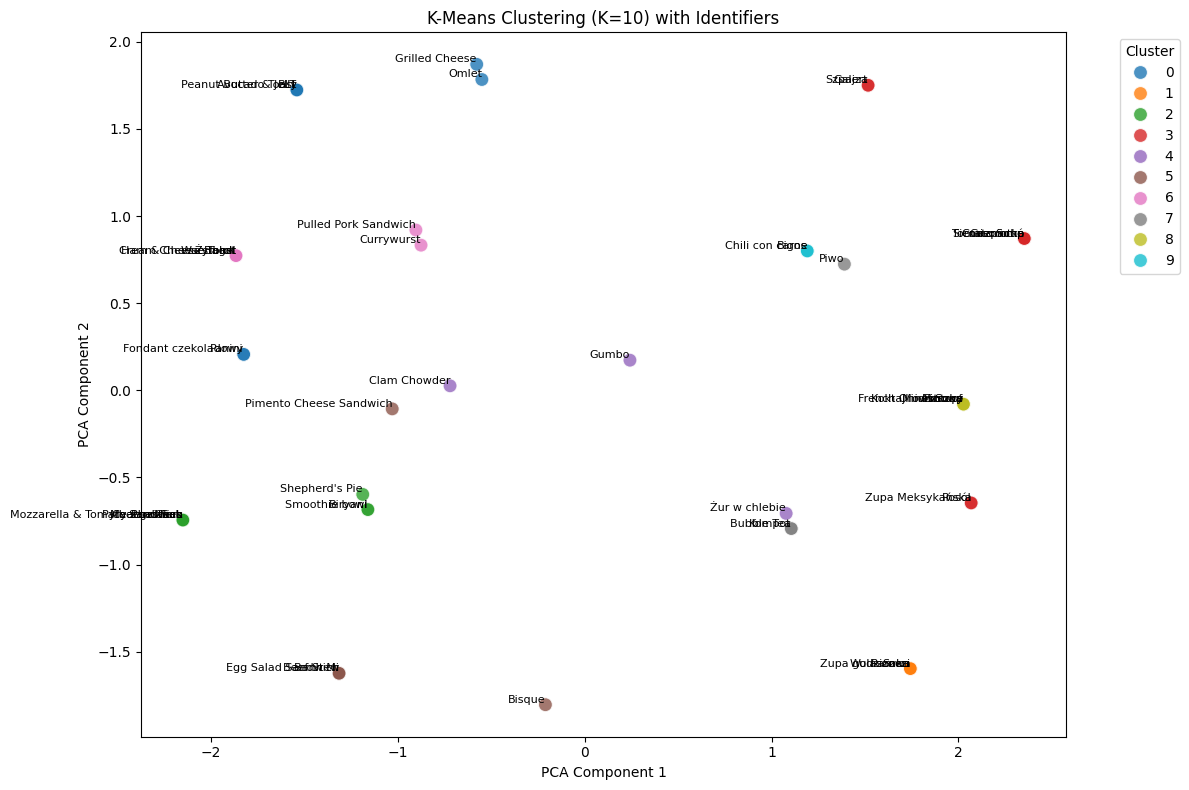

In [ ]:
# Wizualizacja klastrów KMeans (K=10) z nazwami potraw
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_KMeans',
    palette='tab10',
    data=data_kmeans_10,
    s=100,
    alpha=0.8
)

# Dodanie nazw potraw przy punktach
for i in range(len(data_kmeans_10)):
    plt.text(
        data_kmeans_10['PCA1'][i],
        data_kmeans_10['PCA2'][i],
        data_kmeans_10['Name'][i],
        fontsize=8,
        ha='right',
        va='bottom'
    )

# Ustawienia wykresu
plt.title('K-Means Clustering (K=10) with Identifiers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


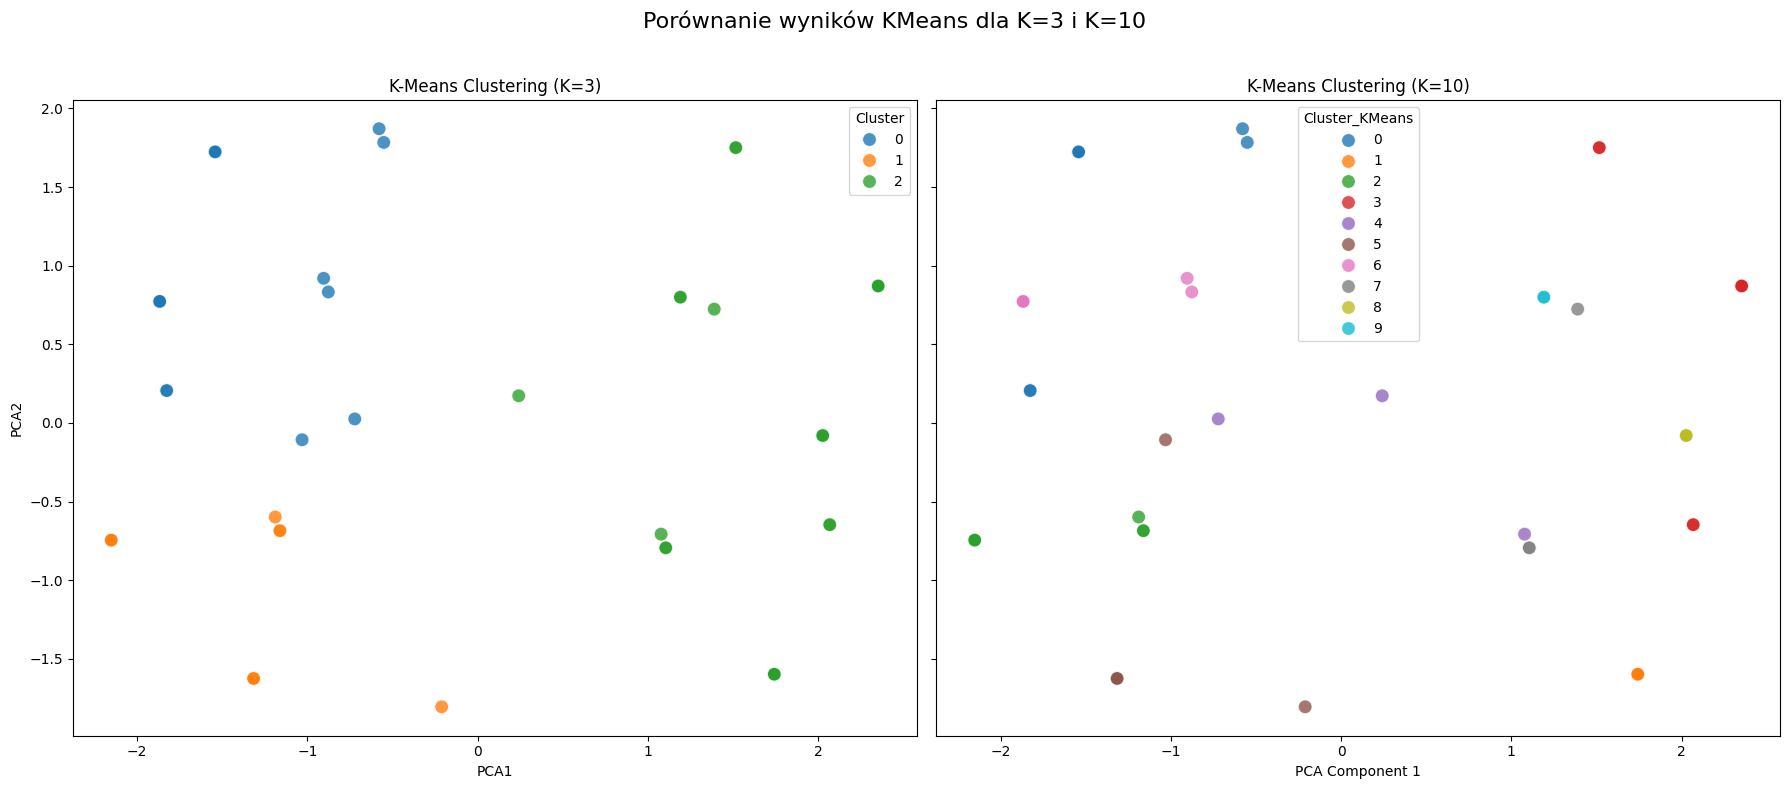

In [ ]:
# Porównanie KMeans dla K=3 i K=10
# Tworzenie subplotów
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

# Wykres dla K=3
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_KMeans',
    palette='tab10',
    data=data_kmeans,
    s=100,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title('K-Means Clustering (K=3)')
axes[0].legend(title='Cluster')

# Wykres dla K=10
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_KMeans',
    palette='tab10',
    data=data_kmeans_10,
    s=100,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title('K-Means Clustering (K=10)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('')

# Estetyka
plt.suptitle('Porównanie wyników KMeans dla K=3 i K=10', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Przeprowadzona analiza klasteryzacyjna pozwoliła na pewne rozróżnienie grup potraw, jednak uzyskane klastry nie zawsze pokrywają się z intuicyjnym lub rzeczywistym podziałem dań. Może to wynikać z ograniczonego zakresu cech dostępnych w zbiorze danych, który obejmuje głównie informacje o konsystencji, sposobie podania, warstwie zewnętrznej czy używanych przyborach.

Aby poprawić jakość klasteryzacji i uzyskać bardziej trafne, semantycznie spójne grupy, warto rozważyć wzbogacenie zbioru danych o dodatkowe zmienne opisujące potrawy. Szczególnie wartościowe mogą być informacje takie jak **główne składniki**, **smak** (słodki, słony, pikantny), **wartość kaloryczna**, **kuchnia regionalna** lub **kraj pochodzenia**.

